- **Project** : Document Clustering & Topic Modeling
- **Goal**: Group documents into topics without labels
- **Dataset**: 20 Newsgroups
- **Concepts**: TF-IDF, Cosine similarity, K-Means, LDA



### Step 1: Import Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


### Step 2: Load Dataset (20 Newsgroups)


In [3]:
newsgroups = fetch_20newsgroups(subset="all", remove=("headers", "footers", "quotes"))

# Create DataFrame
df = pd.DataFrame({"text": newsgroups.data})
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (18846, 1)


,text
0,\n\nI am sure some bashers of Pens fans are pr...
1,My brother is in the market for a high-perform...
2,\n\n\n\n\tFinally you said what you dream abou...
3,\nThink!\n\nIt's the SCSI card doing the DMA t...
4,1) I have an old Jasmine drive which I cann...


### Step 3: Text Preprocessing


In [4]:
stop_words = stopwords.words("english")

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(
    max_features=2000,   # keep top 2000 words
    stop_words=stop_words,
    max_df=0.6,          # ignore very common words
    min_df=5             # ignore rare words
)

X = vectorizer.fit_transform(df["text"])
print("TF-IDF Matrix Shape:", X.shape)


TF-IDF Matrix Shape: (18846, 2000)


### Step 4: K-Means Clustering


In [5]:
num_clusters = 10   # assume 10 topics
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_
df["Cluster"] = labels

print("Sample cluster assignments:")
df.head()


Sample cluster assignments:


,text,Cluster
0,\n\nI am sure some bashers of Pens fans are pr...,6
1,My brother is in the market for a high-perform...,0
2,\n\n\n\n\tFinally you said what you dream abou...,9
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,2
4,1) I have an old Jasmine drive which I cann...,2


### Step 5: Evaluate Clustering


In [6]:
sil_score = silhouette_score(X, labels)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.006794371651510354


### Step 6: Top Terms per Cluster


In [7]:
def get_top_terms_per_cluster(kmeans, vectorizer, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    for i, center in enumerate(kmeans.cluster_centers_):
        top_idx = center.argsort()[-n_terms:][::-1]
        print(f"\nCluster {i}:")
        print(", ".join(terms[j] for j in top_idx))

get_top_terms_per_cluster(kmeans, vectorizer)



Cluster 0:
thanks, please, anyone, know, mail, advance, would, hi, email, looking

Cluster 1:
would, one, like, get, car, good, think, know, time, much

Cluster 2:
drive, scsi, drives, ide, disk, hard, controller, floppy, system, mac

Cluster 3:
windows, file, dos, files, program, window, use, card, using, problem

Cluster 4:
god, jesus, christ, faith, believe, one, bible, sin, us, would

Cluster 5:
edu, new, one, use, also, 00, used, 10, think, sale

Cluster 6:
game, team, games, year, hockey, players, season, last, baseball, play

Cluster 7:
people, would, think, one, israel, say, jews, many, see, know

Cluster 8:
com, ibm, edu, dave, bob, phone, could, one, mail, list

Cluster 9:
government, key, would, fbi, people, clipper, chip, encryption, law, one


### Step 7: Topic Modeling using LDA


In [8]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Show top words for each topic
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out())



Topic 0:
car, one, bike, would, like, get, cars, engine, good, israel

Topic 1:
people, would, government, one, us, like, think, gun, law, get

Topic 2:
dod, like, would, bike, space, cost, get, ride, really, think

Topic 3:
god, jesus, one, people, would, christian, bible, church, believe, think

Topic 4:
windows, use, drive, card, thanks, would, file, one, get, know

Topic 5:
please, thanks, mail, edu, anyone, email, com, know, address, list

Topic 6:
think, one, people, deleted, said, would, fire, fbi, religion, say

Topic 7:
key, space, chip, keys, clipper, encryption, algorithm, nasa, data, system

Topic 8:
game, team, games, year, think, last, players, season, hockey, one

Topic 9:
00, armenian, 10, armenians, 11, turkish, turkey, 12, 13, 15


### Step 8: Visualization of Clusters (2D with PCA)


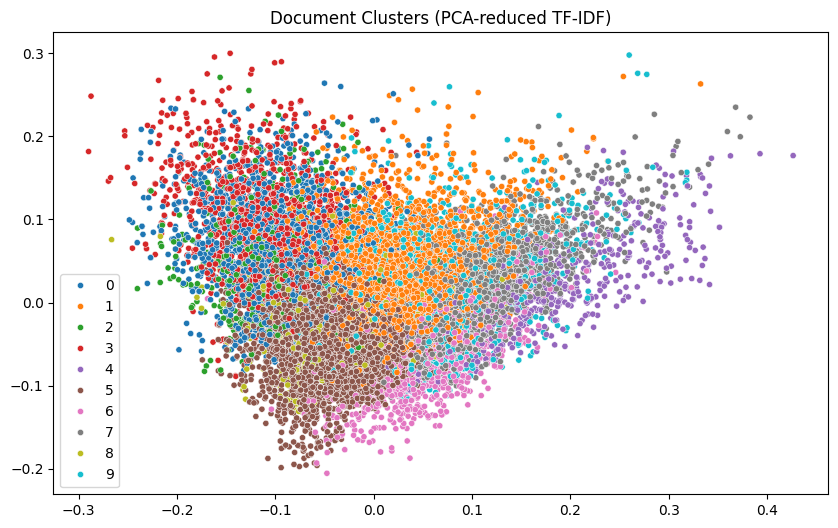

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="tab10", s=20)
plt.title("Document Clusters (PCA-reduced TF-IDF)")
plt.show()


### 📄 Project Summary: Document Clustering & Topic Modeling

**Objective:**
The goal of this project was to group a collection of news articles into meaningful topics **without any labels**, using unsupervised learning techniques. This helps automate the organization and tagging of large text datasets, making it easier for businesses, media, or research teams to extract insights from text data.

**Dataset:**

* **20 Newsgroups dataset** containing thousands of news articles from 20 different categories.
* Focused on the article text, ignoring headers, footers, and quotes.

**Techniques Used:**

1. **Text Vectorization:** TF-IDF (Term Frequency-Inverse Document Frequency) to convert raw text into numerical feature vectors.
2. **Clustering:**

   * **K-Means Clustering** to group similar articles based on TF-IDF features.
   * Evaluated clusters using **Silhouette Score** to check the quality of separation.
3. **Topic Modeling:**

   * **Latent Dirichlet Allocation (LDA)** to identify hidden topics in the corpus.
   * Extracted top words per topic to interpret themes in each cluster.
4. **Dimensionality Reduction & Visualization:**

   * PCA used to reduce TF-IDF features to 2D for scatter plot visualization of clusters.

**Results:**

* Documents were successfully grouped into coherent clusters representing different topics.
* Top words from clusters and LDA topics provided meaningful insights into the underlying themes.
* PCA visualization demonstrated clear separation among clusters, validating clustering results.

**Real-World Impact:**

* Automated topic identification for news, blogs, and research articles.
* Can be used for content recommendation, search optimization, and tagging large text datasets without manual labeling.

**Key Takeaways:**

* TF-IDF + K-Means is effective for initial document clustering.
* LDA complements clustering by providing interpretable topics.
* Dimensionality reduction (PCA) helps visualize high-dimensional text data.